In [ ]:
TASK-1
SRINITHI V
TITANIC SURVIVAL PREDICTION


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

IMPORTING DATASET FORM CSV FILE INTO PANDAS FOR READING


In [4]:
titanic_dataset=pd.read_csv('/content/titanic.csv')
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_dataset.shape

(418, 12)

GATHERING INFORMATION WITH THE DATASET

In [6]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


TO CHECK THE MISSING VALUES

In [7]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

REPLACING THE MISSING VALUES


In [8]:
#DROPPING THE "Cabin COLUMN"
titanic_dataset = titanic_dataset.drop(columns='Cabin' ,axis=1)
#"Age COLUMN" WITH MEAN VALUE
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(),inplace=True)
# "Mode COLUMN" WITH MODE VALUE
print(titanic_dataset['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [10]:
# replacing the missing valuee in 'Fare' column with the mode value
titanic_dataset['Fare'].fillna(titanic_dataset['Fare'].mode()[0],inplace=True)


In [11]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

ANALYZING THE TITANIC DATASET

In [13]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


FINDING THE SURVIVAL OF PEOPLE

In [14]:
titanic_dataset['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

VISUALIZING THE DATA

<Axes: xlabel='Survived', ylabel='count'>

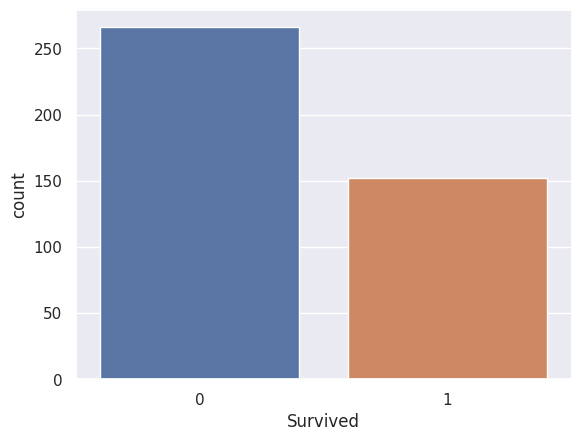

In [17]:
sns.set()
sns.countplot(x='Survived',data=titanic_dataset)

FINDING MALE AND FEMALE

In [18]:
titanic_dataset['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

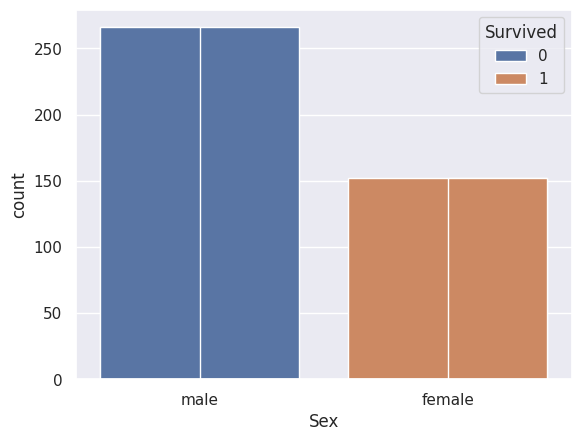

In [19]:
# making a countplot for the 'Sex' column
sns.countplot(x='Sex', data=titanic_dataset)
# Number of survivors Genderwise
sns.countplot(x='Sex', hue='Survived', data=titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

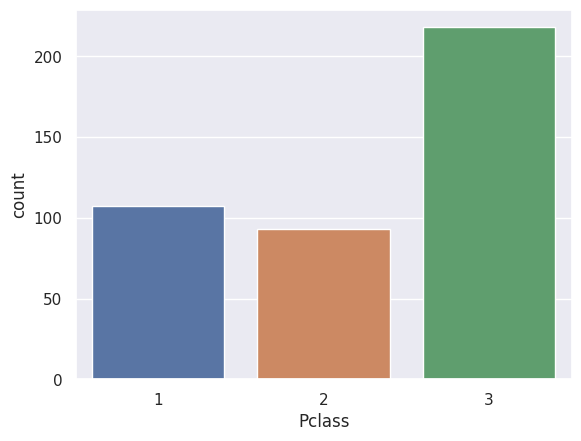

In [20]:
# making a countplot for the 'Pclass' column
sns.countplot(x='Pclass', data=titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

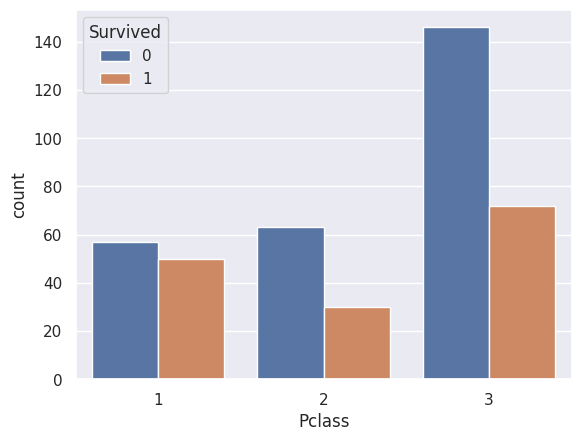

In [21]:
# Number of survivors Pclasswise
sns.countplot(x='Pclass', hue='Survived', data=titanic_dataset)

<Axes: xlabel='Embarked', ylabel='count'>

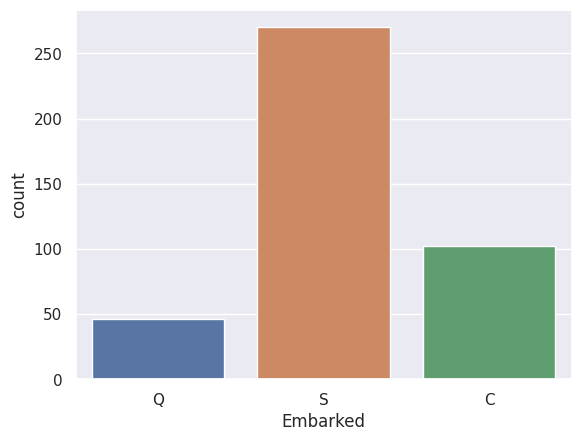

In [22]:
sns.countplot(x='Embarked', data=titanic_dataset)

<Axes: xlabel='Embarked', ylabel='count'>

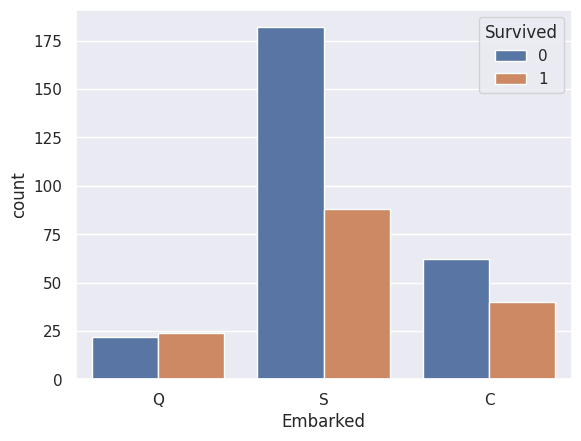

In [23]:
# Number of survivors Embarkedwise
sns.countplot(x='Embarked', hue='Survived', data=titanic_dataset)

CATEGORICAL COLUMNS

In [24]:
titanic_dataset['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [25]:
titanic_dataset['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [27]:
#converting categorical column
titanic_dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':0,'Q':0}},inplace=True)
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


SEPARATING FEATURES AND TARGETS

In [28]:
x=titanic_dataset.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=titanic_dataset['Survived']
print(x)
print(y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         0
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         0
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         0
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         0

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


SPLITING OF THE DATAS

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


LOGISTIC REGRESSION

In [31]:
model=LogisticRegression()
# training the Logistic Regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

MODEL EVALUATION ACCURACY SCORE

In [33]:
# accuracy on training data
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [34]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [35]:
print("Accuracy score of Training data : ",training_data_accuracy)

Accuracy score of Training data :  1.0


ACCURACY OF TESTING DATA

In [37]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [39]:
testing_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("Accuracy score of Testing data : ",testing_data_accuracy)

Accuracy score of Testing data :  1.0
